# One-sample t-test
A simple example of a one-sample t-test.

Summary from wikipedia:  
> The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.  
>
> A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other. 

Further down:  
>Among the most frequently used t-tests are:
> - A one-sample location test of whether the mean of a population has a value specified in a null hypothesis.
> - A two-sample location test of the null hypothesis such that the means of two populations are equal. All such tests are usually called Student's t-tests, though strictly speaking that name should only be used if the variances of the two populations are also assumed to be equal; the form of the test used when this assumption is dropped is sometimes called Welch's t-test. These tests are often referred to as "unpaired" or "independent samples" t-tests, as they are typically applied when the statistical units underlying the two samples being compared are non-overlapping.

Further reading:  
- [How to use the t-test to handle small samples and unknown standard deviations](https://www.dummies.com/education/math/statistics/how-to-use-the-t-test-to-handle-small-samples-and-unknown-standard-deviations/) (dummies.com)
- [Statistical tests: when to use which?](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740) (towardsdatascience)
- [Hypothesis testing: critical value approach](https://newonlinecourses.science.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/critical-value-approach) (Penn State)
- [Type I and II errors](http://www.cs.uni.edu/~campbell/stat/inf5.html) (CS, University of Northern Iowa)

---
tags: statistic, t-test, visualization, hypothesis testing, critical value approach, p-values

# Imports

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Problem description
This is [from dummies.com]()

> Suppose a delivery company claims they deliver their packages in $\mu_0=2$ days on average, and you suspect it’s longer than that. 
> To test this claim, you take a random sample of $n=10$ packages and record their delivery times. You find the sample mean is
> $\mu_\text{sample} = 2.3$ days
and the sample standard deviation is $\sigma_\text{sample} = 0.35$ days.  

We have all the necessary parameters:

In [2]:
# Parameters
mu0 = 2 # mean of the null hypothesis
n = 10 # sample size
mu_sample = 2.3 # sample mean
sigma_sample = .35 # sample standard deviation

# Hypothesis testing
- Null hypothesis: average delivery time is $$\mu=\mu_0\,.$$
- Alternative hypothesis: average delivery time is longer: $$\mu > \mu_0\,.$$

Calculate the t-statistic and the corresponding p-value:

In [3]:
sem = sigma_sample/np.sqrt(n) # estimate for the sample error of the mean

t_stat = (mu_sample - mu0)/sem

p_value = stats.t.sf(t_stat, df=n - 1, loc=0, scale=1)

print(f"{'Mean under null hypothesis':<40}: {mu0}")
print(f"{'Sample mean':<40}: {mu_sample:.3f}")
print(f"{'t-statistic':<40}: {t_stat:.4f}")
print(f"{'p-value':<40}: {p_value:.5f}")

Mean under null hypothesis              : 2
Sample mean                             : 2.300
t-statistic                             : 2.7105
p-value                                 : 0.01199


Under the null hypothesis, the t-statistic follows a normal Student's t-distribution:

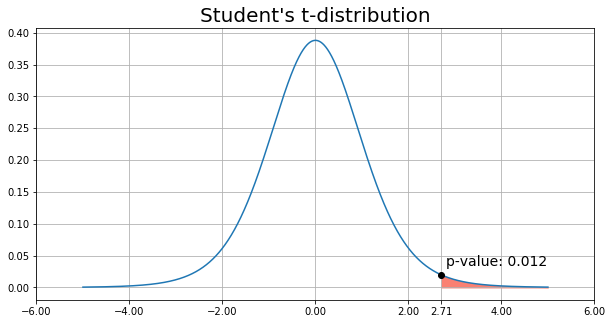

In [4]:
h = .002
tmax = 5
tmin = -tmax

pdf_stat = stats.t.pdf(t_stat, df=n - 1)

t = np.arange(tmin, tmax+h, h)
y = stats.t.pdf(t,df=n-1)

tmore = np.arange(t_stat, tmax+h, h)
ymore = stats.t.pdf(tmore, df=n-1)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(t, y)
ax.fill_between(tmore, 0, ymore, color='salmon')

ax.set_title("Student's t-distribution", fontsize=20)

ax.plot(t_stat, pdf_stat, 'o', color='k')
# ax.text(t_stat+.1, pdf_stat+.01, 't-statistic', fontsize=14, horizontalalignment='left', verticalalignment='bottom')
ax.text(t_stat+.1, pdf_stat+.01, f'p-value: {p_value:.3f}', fontsize=14, horizontalalignment='left', verticalalignment='bottom')

ax.set_xticks(np.append(ax.get_xticks(), t_stat))

ax.grid();

 # The critical value approach
 Follow [this example](https://newonlinecourses.science.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/critical-value-approach).


# Null and alternative hypothesis
Let $\mu_0 = 3$.
- Null hypothesis (H0): $\mu = \mu_0$
- Alternative hypothesis (H1): $\mu > \mu_0$

# Computing the critical value
Before having access to any sample, we can already calculate the critical value for the t-statistic:

In [5]:
alpha = .95 # significance level
n = 15 # sample size

t_crit = stats.t.ppf(alpha, df=n-1)
print(f"{'Significance level':<30}: {alpha:.0%}")
print(f"{'Critical value':<30}: {t_crit:.5f}")

Significance level            : 95%
Critical value                : 1.76131


# Visualizing the rejection region

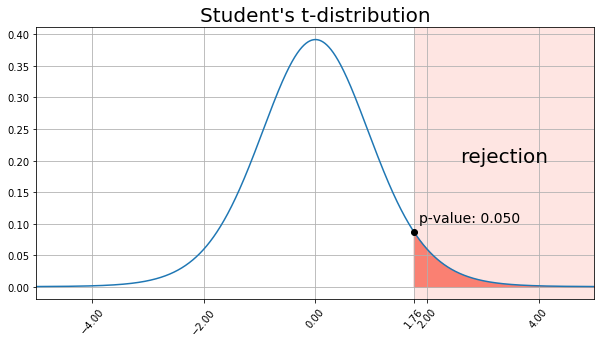

In [6]:
h = .002
tmax = 5
tmin = -tmax

pdf_crit = stats.t.pdf(t_crit, df=n - 1)

t = np.arange(tmin, tmax + h, h)
y = stats.t.pdf(t, df=n-1)

tmore = np.arange(t_crit, tmax + h, h)
ymore = stats.t.pdf(tmore, df=n - 1)

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))


ax.plot(t, y)
ax.fill_between(tmore, 0, ymore, color='salmon')

ax.set_title("Student's t-distribution", fontsize=20)

ax.plot(t_crit, pdf_crit, 'o', color='k')
ax.text(t_crit+.1, pdf_crit + .01, f'p-value: {1 - alpha:.3f}', fontsize=14, horizontalalignment='left', verticalalignment='bottom')

ax.set_xticks(np.append(ax.get_xticks(), t_crit))

ax.tick_params(axis='x', rotation=50)
ax.set_xlim(tmin, tmax)
ax.axvspan(t_crit, tmax, facecolor='salmon', alpha=.2)

ax.text((t_crit + tmax)/2, ax.get_ylim()[1]/2, 'rejection', fontsize=20, horizontalalignment='center', verticalalignment='center')

ax.grid();